# A Project on VAR Model

#### Importing the required libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

#### Reading the data

In [224]:
#reading first dataframe
df=pd.read_csv("M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.index.freq='MS'
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [225]:
#reading second datafrane
sp=pd.read_csv("C:\\Users\\AKASH pc\\Downloads\\Python for Time Series Data Analysis\\Data\\PCEPersonalSpending.csv",index_col=0,parse_dates=True)
sp.index.freq='MS'
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


#### Joining both dataframe to form one dataframe

In [226]:
#concating a new dataframe
data=pd.concat([df,sp],axis=1)
data.shape
data.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [227]:
#dropping null values
data=data.dropna()


#### Just plotting the data to see the trend

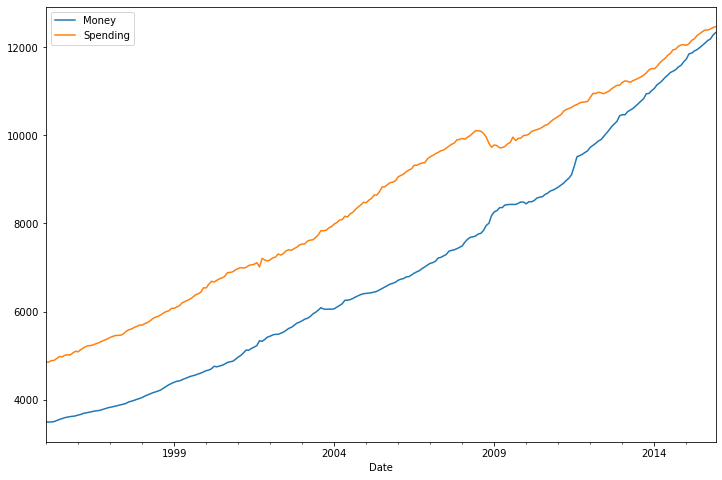

In [228]:
#plotting the data
data.plot(figsize=(12,8))

#### Performing adfuller test to check the stationarity of both the columns

In [229]:
adfuller(data['Money'])

(4.239022425670641,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [230]:
adfuller(data['Spending'])

(0.14979608598625258,
 0.9693009944428311,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

data is not satisfied so we do the differencing till the data become stationary

In [237]:
data1=data.diff()
print(adfuller(data1['Spending'][1:]))
adfuller(data1['Money'][1:])

(-7.226973930850648, 2.0410272592129706e-10, 2, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 2328.23145843905)


(-2.0574040497379387,
 0.26198379785112474,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.948346069441)

We will again difference

In [238]:
data2=data1.diff().dropna()
print(adfuller(data2['Money']))
adfuller(data2['Spending'])

(-7.077470794342999, 4.760674931296582e-10, 14, 235, {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}, 2217.097202826827)


(-8.760145426337711,
 2.6878999679872806e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 2339.3283710766104)

now we are satisfied that our data is stationary

#### Train-Test Split

In [239]:
nobs=12
train=data2.iloc[:-nobs]
test=data2.iloc[-nobs:]

#### Grid Search for order p of AR of VAR model 

In [242]:
#fitting on range of number to know the order of VAR model
model=VAR(train) 
for p in range(9):
    results=model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')

ORDER 0
AIC: 14.74710921809045
ORDER 1
AIC: 14.178610495220896
ORDER 2
AIC: 13.955189367163705
ORDER 3
AIC: 13.849518291541038
ORDER 4
AIC: 13.827950574458283
ORDER 5
AIC: 13.78730034460964
ORDER 6
AIC: 13.799076756885809
ORDER 7
AIC: 13.797638727913972
ORDER 8
AIC: 13.747200843672085


Order 5 shows the best result

#### Fitting the model on order 5

In [245]:
results=model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 16, Nov, 2020
Time:                     22:30:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

#### Forcasting the test dataset 

In [246]:
#we obtain an ndarray by forecasting
lagged_values=train.values[-5:]
z=results.forecast(y=lagged_values,steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

#### Creating the DataFrame of the forcasted arrat

In [247]:
idx=pd.date_range('2015-01-01',periods=12,freq='MS')
forecasted_df=pd.DataFrame(z,columns=['Money_2d','Spending_2d'],index=idx)
forecasted_df

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


But this data is differenced data we need to revert the data

#### Reverting the data into the original form

In [248]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_df['Money_1d'] = (data['Money'].iloc[-nobs-1]-data['Money'].iloc[-nobs-2]) + forecasted_df['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
forecasted_df['MoneyForecast'] = data['Money'].iloc[-nobs-1] + forecasted_df['Money_1d'].cumsum()

# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_df['Spending_1d'] = (data['Spending'].iloc[-nobs-1]-data['Spending'].iloc[-nobs-2]) + forecasted_df['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
forecasted_df['SpendingForecast'] = data['Spending'].iloc[-nobs-1] + forecasted_df['Spending_1d'].cumsum()

In [249]:
forecasted_df


,Money_2d,Spending_2d,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


In [250]:
#obtaining the original test data without being differenced
test_range=data[-12:]
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


#### Plotting the test and forecasted Money Data

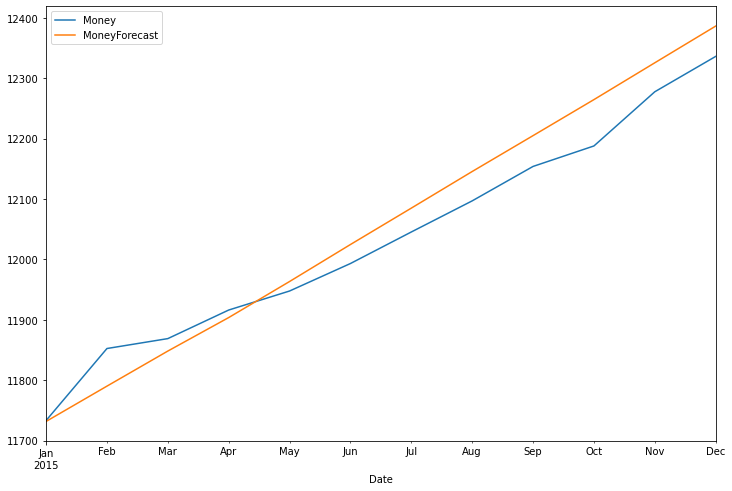

In [253]:
test_range['Money'].plot(figsize=(12,8),legend=True)
forecasted_df['MoneyForecast'].plot(legend=True)

#### Plotting the test and forecasted Spending Data

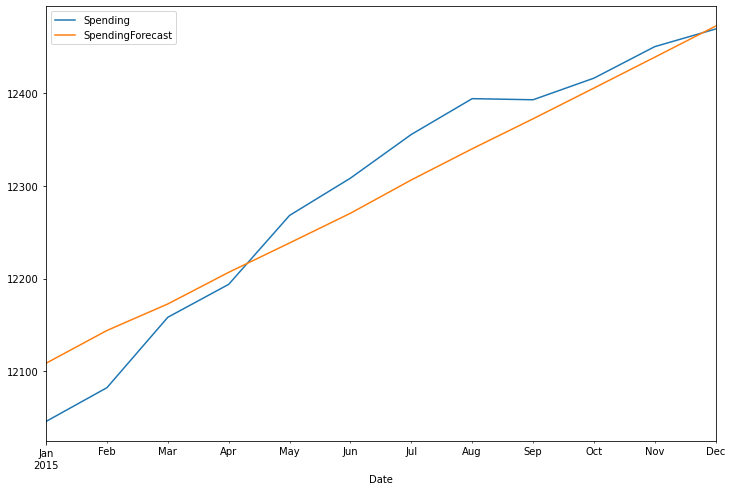

In [254]:
test_range['Spending'].plot(figsize=(12,8),legend=True)
forecasted_df['SpendingForecast'].plot(legend=True)

#### Evaluating the model

In [211]:
#for spending 
np.sqrt(mean_squared_error(test_range['Spending'],forecasted_df['SpendingForecast']))

37.00117516940808

In [213]:
test_range['Spending'].mean()

12294.533333333333

In [252]:
#for money
np.sqrt(mean_squared_error(test_range['Money'],forecasted_df['MoneyForecast']))

43.71049653558938

In [214]:
test_range['Money'].mean()

12034.008333333333

Thank you